<a href="https://colab.research.google.com/github/monolixd/Ailearn/blob/main/CarSalesIndia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 1.Dataset Preparing

In [5]:
import pandas as pd

# ระบุเส้นทางไปยังไฟล์ใน Google Drive
file_path = '/content/drive/MyDrive/LearningforIntern/CarsalesIndia/Car Sales India 2024.xlsx'

# โหลดข้อมูล
df = pd.read_excel(file_path)

# แสดงข้อมูลตัวอย่าง
print(df.head())

      Make        Model  January February  March  April  May   June  July  \
0  Citroen       Basalt        0        0      0      0    0    0.0     0   
1  Citroen           C3      234      211    265    251  155   77.0    90   
2  Citroen     Aircross      231      127    211     93  125  136.0    68   
3  Citroen  C5 Aircross        1        0      0      1    0    0.0     0   
4  Citroen         e-C3      184       83    530     59  235  126.0   177   

   August  September  October   November   December  Total Segment  Body Type  \
0     579        341       221         47        79   1267      C2        SUV   
1     507        300       300        200       300   2890      C1  Hatchback   
2      38         41       103        201        96   1470      C2        SUV   
3       1          1         4          0         1      9      D2        SUV   
4     150         28        89         61        90   1812      C1        SUV   

   MoM %  YoY %  
0     68      0  
1     50     -

## ตรวจสอบข้อมูลเบื้องต้น

In [6]:
df.info()  # ตรวจสอบประเภทข้อมูล
df.describe()  # ดูสถิติพื้นฐาน
df.isnull().sum()  # ตรวจสอบค่าที่หายไป (missing values)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87 entries, 0 to 86
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Make       87 non-null     object 
 1   Model      87 non-null     object 
 2   January    87 non-null     int64  
 3   February   87 non-null     object 
 4   March      87 non-null     int64  
 5   April      87 non-null     int64  
 6   May        87 non-null     int64  
 7   June       86 non-null     float64
 8   July       87 non-null     int64  
 9   August     87 non-null     int64  
 10  September  87 non-null     int64  
 11  October    87 non-null     int64  
 12  November   87 non-null     int64  
 13  December   87 non-null     int64  
 14  Total      87 non-null     int64  
 15  Segment    87 non-null     object 
 16  Body Type  87 non-null     object 
 17  MoM %      87 non-null     int64  
 18  YoY %      87 non-null     int64  
dtypes: float64(1), int64(13), object(5)
memory usage: 13

,0
Make,0
Model,0
January,0
February,0
March,0
April,0
May,0
June,1
July,0
August,0


In [8]:
# ปิดคำเตือนที่ไม่จำเป็น
import warnings
warnings.filterwarnings('ignore')

# นำเข้าไลบรารีที่จำเป็น
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ระบุ path ของไฟล์ใน Google Drive (แก้ไขให้ตรงกับตำแหน่งที่คุณอัปโหลดไฟล์ไว้)
file_path_1 = "/content/drive/MyDrive/LearningforIntern/CarsalesIndia/Car Sales India 2024.xlsx"
file_path_2 = "/content/drive/MyDrive/LearningforIntern/CarsalesIndia/Car Sales in India - 2024.xlsx"
file_path_3 = "/content/drive/MyDrive/LearningforIntern/CarsalesIndia/Car Sales in India - 2024 (Unpivot Version).xlsx"

# โหลดข้อมูลจากไฟล์ Excel
df1 = pd.read_excel(file_path_1)
df2 = pd.read_excel(file_path_2)
df3 = pd.read_excel(file_path_3)

# แสดงข้อมูล 5 แถวแรกของแต่ละ DataFrame
df1.head(), df2.head(), df3.head()


(      Make        Model  January February  March  April  May   June  July  \
 0  Citroen       Basalt        0        0      0      0    0    0.0     0   
 1  Citroen           C3      234      211    265    251  155   77.0    90   
 2  Citroen     Aircross      231      127    211     93  125  136.0    68   
 3  Citroen  C5 Aircross        1        0      0      1    0    0.0     0   
 4  Citroen         e-C3      184       83    530     59  235  126.0   177   
 
    August  September  October   November   December  Total Segment  Body Type  \
 0     579        341       221         47        79   1267      C2        SUV   
 1     507        300       300        200       300   2890      C1  Hatchback   
 2      38         41       103        201        96   1470      C2        SUV   
 3       1          1         4          0         1      9      D2        SUV   
 4     150         28        89         61        90   1812      C1        SUV   
 
    MoM %  YoY %  
 0     68      0 

## 1.ทำความสะอาด (Cleaning) และเตรียมข้อมูล (Preprocessing) ก่อนนำไปวิเคราะห์ต่อ

In [9]:
df1.isnull().sum(), df2.isnull().sum(), df3.isnull().sum()

(Make         0
 Model        0
 January      0
 February     0
 March        0
 April        0
 May          0
 June         1
 July         0
 August       0
 September    0
 October      0
 November     0
 December     0
 Total        0
 Segment      0
 Body Type    0
 MoM %        0
 YoY %        0
 dtype: int64,
 Make         0
 Model        0
 January      0
 February     0
 March        0
 April        0
 May          0
 June         1
 July         0
 August       0
 September    0
 October      0
 November     0
 December     0
 Total        0
 Segment      0
 Body Type    0
 MoM %        0
 YoY %        0
 dtype: int64,
 Make         0
 Model        0
 Months       0
 Sales        0
 Total        0
 Segment      0
 Body Type    0
 MoM %        0
 YoY %        0
 dtype: int64)

## 2.แปลงข้อมูลให้เป็นประเภทที่ถูกต้อง

In [10]:
df1['February'] = pd.to_numeric(df1['February'], errors='coerce')
df2['February'] = pd.to_numeric(df2['February'], errors='coerce')

##  3.เติมค่าที่หายไป (NaN) ด้วย 0

In [11]:
df1.fillna(0, inplace=True)
df2.fillna(0, inplace=True)
df3.fillna(0, inplace=True)

## 4.ตรวจสอบประเภทของข้อมูล

In [13]:
df1.dtypes, df2.dtypes, df3.dtypes

(Make          object
 Model         object
 January        int64
 February     float64
 March          int64
 April          int64
 May            int64
 June         float64
 July           int64
 August         int64
 September      int64
 October        int64
 November       int64
 December       int64
 Total          int64
 Segment       object
 Body Type     object
 MoM %          int64
 YoY %          int64
 dtype: object,
 Make          object
 Model         object
 January        int64
 February     float64
 March          int64
 April          int64
 May            int64
 June         float64
 July           int64
 August         int64
 September      int64
 October        int64
 November       int64
 December       int64
 Total          int64
 Segment       object
 Body Type     object
 MoM %          int64
 YoY %          int64
 dtype: object,
 Make         object
 Model        object
 Months       object
 Sales         int64
 Total         int64
 Segment      object
 Body 

# Analyzing

## 1. กราฟแท่งแสดงยอดขายรวมของแต่ละเดือน

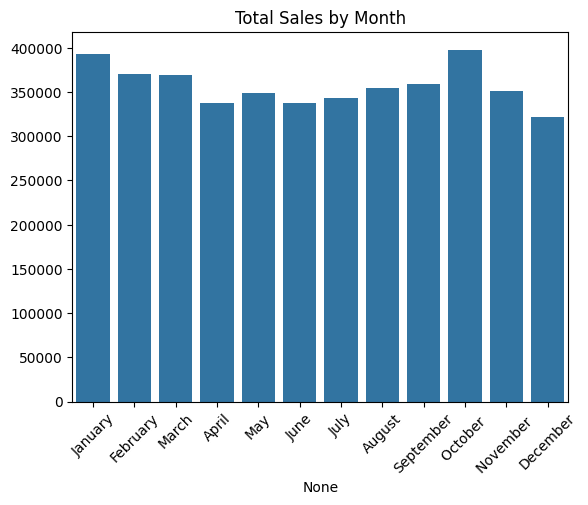

In [14]:
monthly_sales = df1[['January', 'February', 'March', 'April', 'May', 'June',
                     'July', 'August', 'September', 'October ', 'November ', 'December']].sum()
sns.barplot(x=monthly_sales.index, y=monthly_sales.values)
plt.title('Total Sales by Month')
plt.xticks(rotation=45)
plt.show()

## 2.กราฟแท่งแสดงการกระจายยอดขายตามเซกเมนต์ของรถยนต์

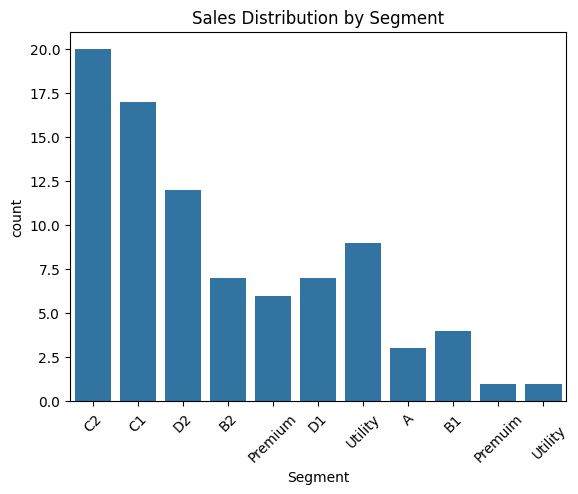

In [15]:
sns.countplot(data=df1, x='Segment')
plt.title('Sales Distribution by Segment')
plt.xticks(rotation=45)
plt.show()

## 3. กราฟแท่งแสดงการกระจายยอดขายตามประเภทตัวถังของรถยนต์

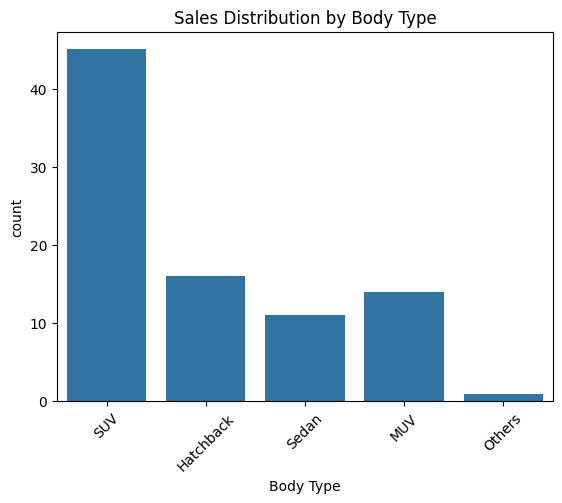

In [16]:
sns.countplot(data=df1, x='Body Type')
plt.title('Sales Distribution by Body Type')
plt.xticks(rotation=45)
plt.show()

# ยอดขายรายไตรมาส (Quarterly Sales)

In [21]:
df1['QS1'] = df1['January'] + df1['February'] + df1['March']
df1['QS2'] = df1['April'] + df1['May'] + df1['June']
df1['QS3'] = df1['July'] + df1['August'] + df1['September']
df1['QS4'] = df1['October '] + df1['November '] + df1['December']

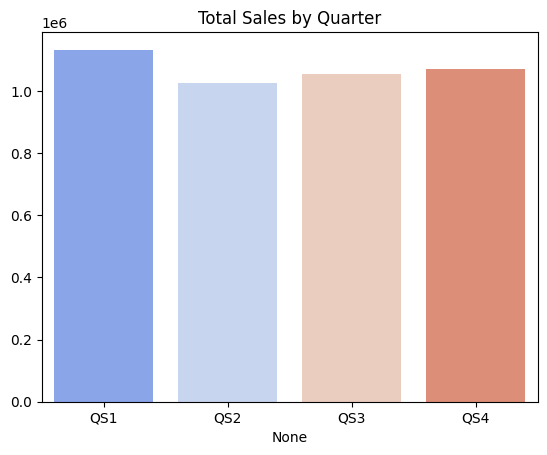

In [23]:
quarterly_sales = df1[['QS1', 'QS2', 'QS3', 'QS4']].sum()
sns.barplot(x=quarterly_sales.index, y=quarterly_sales.values, palette="coolwarm")
plt.title('Total Sales by Quarter')
plt.show()

## เปรียบเทียบยอดขายรายไตรมาสของแต่ละแบรนด์

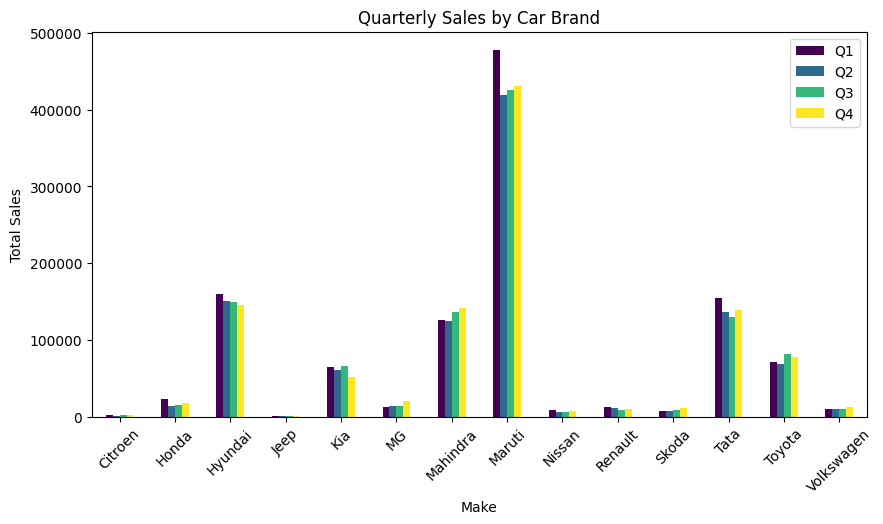

In [20]:
df_quarterly = df1.groupby("Make")[['Q1', 'Q2', 'Q3', 'Q4']].sum()
df_quarterly.plot(kind='bar', figsize=(10,5), colormap='viridis')
plt.title('Quarterly Sales by Car Brand')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

# Create Model

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

## 1. เตรียมข้อมูลสำหรับการสร้างโมเดล

In [32]:
X = df1[['QS1', 'QS2', 'QS3', 'QS4']]
y = df1['Total']

## 2. แบ่งข้อมูลออกเป็นชุดฝึก (Training Set) และชุดทดสอบ (Testing Set)

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 3. สร้างและฝึกฝนโมเดล Linear Regression

In [34]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

## 4. ทำนายผลลัพธ์

In [35]:
y_pred = model.predict(X_test)

## 5. ประเมินผลโมเดล

In [37]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 1.19016149626678e-21
R-squared: 1.0
